# Importing the tools

In [110]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from  plotly.subplots import make_subplots

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

# Reading Data

In [111]:
df = (pd.read_csv("Shopping_Basket_Optimisation.csv",dtype=str)
      .apply(lambda x: x.astype(str)
      .str.strip()
      .str.lower()))

In [112]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,tropical fruit,yogurt,coffee,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,whole milk,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,pip fruit,yogurt,cream cheese,meat spreads,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,other vegetables,whole milk,condensed milk,long life bakery product,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [113]:
df.shape

(17356, 32)

# Tidy Data

In [114]:
transactions = []
for n in df.iterrows():
    transactions.append(list(n[1].values))

In [115]:
print("number of items in each example : ",len(transactions[0]),"| lenght of the dataset : ",len(transactions))

number of items in each example :  32 | lenght of the dataset :  17356


In [116]:
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)

In [117]:
transactions[3:4][0][:7]

['pip fruit', 'yogurt', 'cream cheese', 'meat spreads', 'nan', 'nan', 'nan']

In [118]:
df = pd.DataFrame(te_data,columns=te.columns_).drop(columns=["nan"])
df.head()

,abrasive cleaner,almonds,antioxydant juice,artif. sweetener,asparagus,avocado,babies food,baby cosmetics,baby food,bacon,...,white wine,whole milk,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt,yogurt cake,zucchini,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# Gaining Insight 

In [119]:
print("number of unique items brought : ",len(df.columns))

number of unique items brought :  276


In [120]:
(df.sum()).sort_values(ascending=False)

whole milk               2513
other vegetables         1903
rolls/buns               1809
mineral water            1788
soda                     1762
                         ... 
cock                        3
water spray                 3
preservation products       2
baby food                   1
sound storage medium        1
Length: 276, dtype: int64

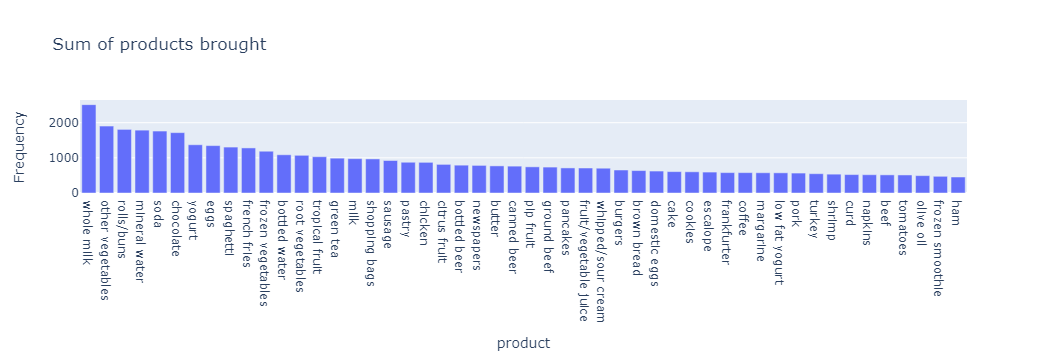

In [130]:
fig = px.bar((df.sum()).sort_values(ascending=False)[:50],labels=None,title="Sum of products brought")
fig.update_layout(xaxis_title="product",yaxis_title="Frequency",showlegend=False)

# Apply Apriori

## what to know before applying Apriori model

<hr>

#### Support: it is an indication of how frequently the itemset appears in the dataset.
#### Confidence: it is an indication of how often the rule has been found to be true.
#### Lift: The ratio of the observed support to that expected if X and Y were independent.
#### Conviction: The ratio of the expected frequency that X occurs without Y (that is to say, the frequency that the rule makes an incorrect prediction) if X and Y were independent divided by the observed frequency of incorrect predictions.
#### Leverage: Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent.

In [145]:
ap = apriori(df,min_support=0.01,use_colnames=True,verbose=1).sort_values("support", ascending = False)
ap['length'] = ap['itemsets'].apply(lambda x:len(x))
ap

Processing 8 combinations | Sampling itemset size 4e 32


,support,itemsets,length
105,0.144791,(whole milk),1
68,0.109645,(other vegetables),1
79,0.104229,(rolls/buns),1
60,0.103019,(mineral water),1
89,0.101521,(soda),1
...,...,...,...
82,0.010083,(salt),1
1,0.010025,(baking powder),1
197,0.010025,"(yogurt, pastry)",2
135,0.010025,"(citrus fruit, root vegetables)",2


Support value gives us these information:
<br>
### Head 5

* 14 percent of 100 purchases are "whole milk"*
* 10 percent of 100 purchases are "other vegetables"*
* 10 percent of 100 purchases are "rolls/buns"*
* 10 percent of 100 purchases are "mineral water"*
* 10 percent of 100 purchases are "soda"*


### Tail 5

* 1 percent of 100 purchases are "salt"
* 1 percent of 100 purchases are "baking powder"
* 1 percent of 100 purchases are "yogurt" and "pastry"
* 1 percent of 100 purchases are "citrus fruit" and "root vegetables"
* 1 percent of 100 purchases are "semi-finished bread"

Since the product (whole milk) has the highiest count in the data it is reasonable it will have the highiest support because $$support = {{sum} \
\over lenght}$$


In [142]:
ap[ap["length"] == 2].head()

,support,itemsets,length
191,0.042406,"(other vegetables, whole milk)",2
207,0.032093,"(rolls/buns, whole milk)",2
225,0.031747,"(yogurt, whole milk)",2
211,0.027714,"(root vegetables, whole milk)",2
185,0.026850,"(other vegetables, root vegetables)",2


In [143]:
ap[ap["length"] == 3].head()

,support,itemsets,length
227,0.013137,"(other vegetables, root vegetables, whole milk)",3
228,0.012618,"(yogurt, other vegetables, whole milk)",3
226,0.010141,"(rolls/buns, other vegetables, whole milk)",3


# Association Rules 

In [144]:
# Association Rules & Info
df_ar = association_rules(ap, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(yogurt, other vegetables)",(whole milk),0.024602,0.144791,0.012618,0.512881,3.542203,0.009056,1.755645,0.735792


* Antecedent support variable tells us probability of antecedent products alone
* Consequents support variable tells us probability of consequents products alone
* The support value is the value of the two products (Antecedents and Consequents)
* Confidence is an indication of how often the rule has been found to be true.
* The ratio of the observed support to that expected if X and Y were independent.